In [1]:
import pennylane as qml
from pennylane import numpy as np
import random
import torch
from matplotlib import pyplot as plt
import os
import pandas as pd

In [2]:
qubits = 8
layer = 1

In [3]:
dev = qml.device('default.qubit', wires=qubits)
@qml.qnode(dev, interface='torch', diff_method='backprop')
def gen_circuit(w):
    z1 = random.uniform(-1, 1)
    z2 = random.uniform(-1, 1)
    # construct generator circuit for both atom vector and node matrix
    for i in range(qubits):
        qml.RY(np.arcsin(z1), wires=i)
        qml.RZ(np.arcsin(z2), wires=i)
    for l in range(layer):
        for i in range(qubits):
            qml.RY(w[i], wires=i)
        for i in range(qubits-1):
            qml.CNOT(wires=[i, i+1])
            qml.RZ(w[i+qubits], wires=i+1)
            qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]

In [4]:
gen_weights = np.random.rand(layer*(qubits*2-1))*2*np.pi-np.pi

In [5]:
gen_weights

tensor([ 1.11473813,  1.45244442,  0.06015401,  0.72826525, -0.24024054,
        -1.88594679, -3.03659281, -1.41250762, -2.55447139, -0.53029171,
         2.15523227,  2.89213518,  0.88064096,  0.10053426, -1.40857608], requires_grad=True)

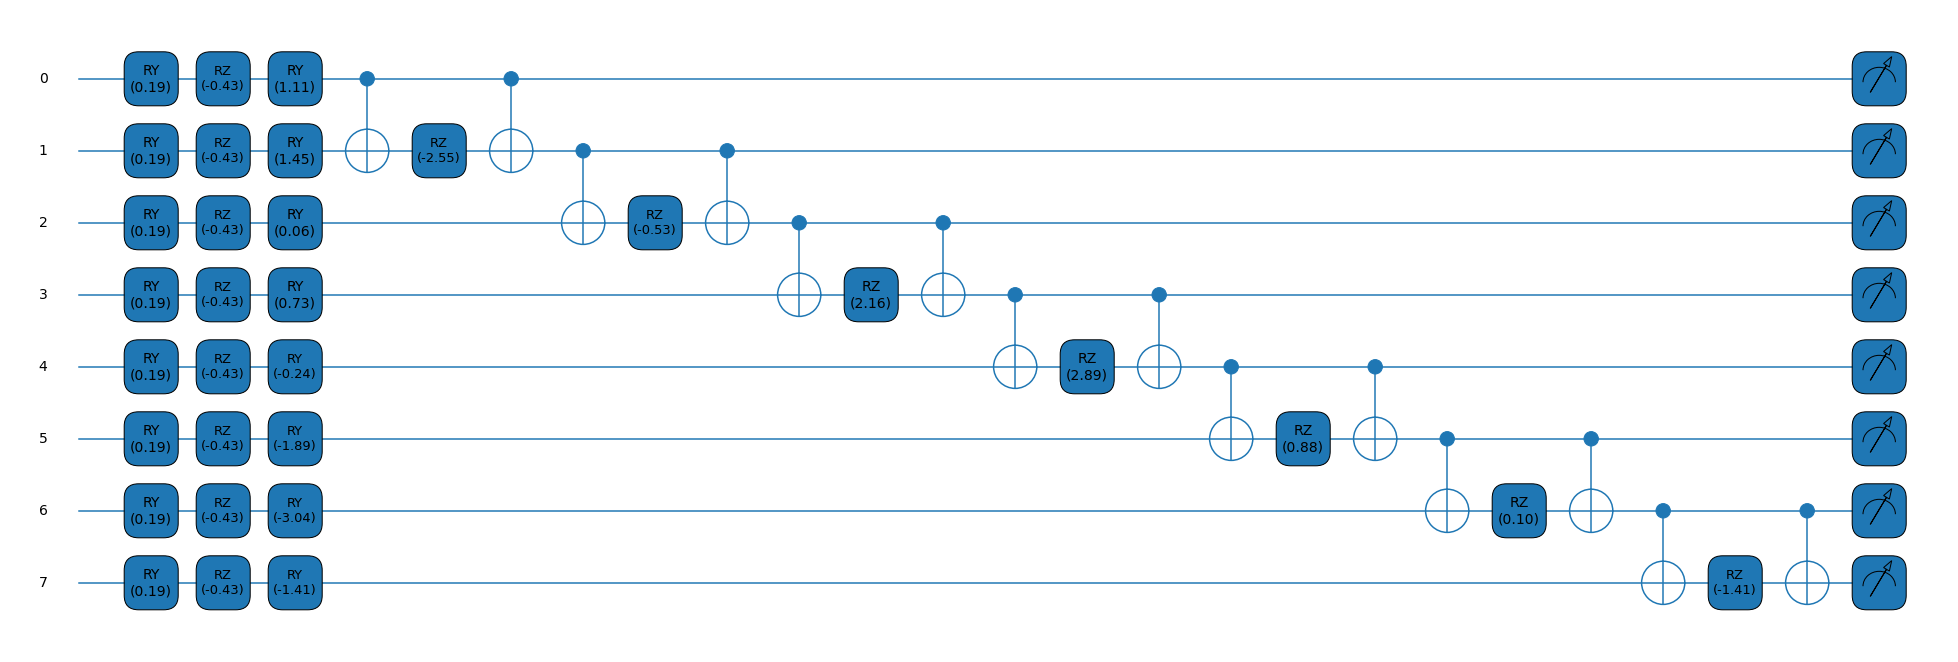

In [6]:
fig, ax = qml.draw_mpl(gen_circuit, decimals=2)(gen_weights)

In [7]:
sample_list = [gen_circuit(gen_weights) for i in range(5000)]

In [8]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

<Figure size 4320x2160 with 0 Axes>

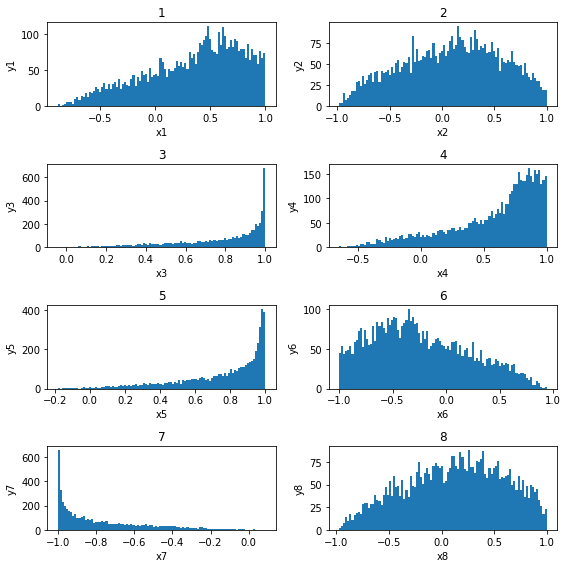

In [9]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()

In [10]:
resume_iters = 120
date = '20211201_170520'
model_dir_path = r'/home/ken/projects/QuantumGAN-PyTorch/results/quantum-GAN/'+date+'/train/model_dir'
weights_pth = os.path.join(model_dir_path, 'molgan_red_weights.csv')
weights = pd.read_csv(weights_pth, header=None).iloc[resume_iters-1, 1:].values

In [11]:
gen_weights = torch.tensor(list(weights), requires_grad=True)

In [12]:
gen_weights

tensor([ 1.8881, -1.5652,  1.6558,  4.4185, -1.0321,  0.1982,  1.7985, -1.6007,
         1.6335,  2.9697,  0.6342, -2.9884,  0.0180,  0.6333, -1.3562, -1.2375,
         2.4672,  0.7868,  2.7774,  0.9055,  2.0929, -0.4526,  2.4844,  0.5443,
        -2.8111, -0.0384,  1.2057,  0.4610, -1.0430, -2.2649,  1.8803, -1.4078,
        -2.1386, -1.7687, -1.9020,  0.8592,  0.7792, -1.2632, -1.7972, -1.2528,
        -0.5135,  3.0529,  0.9200,  1.2985,  2.8128], dtype=torch.float64,
       requires_grad=True)

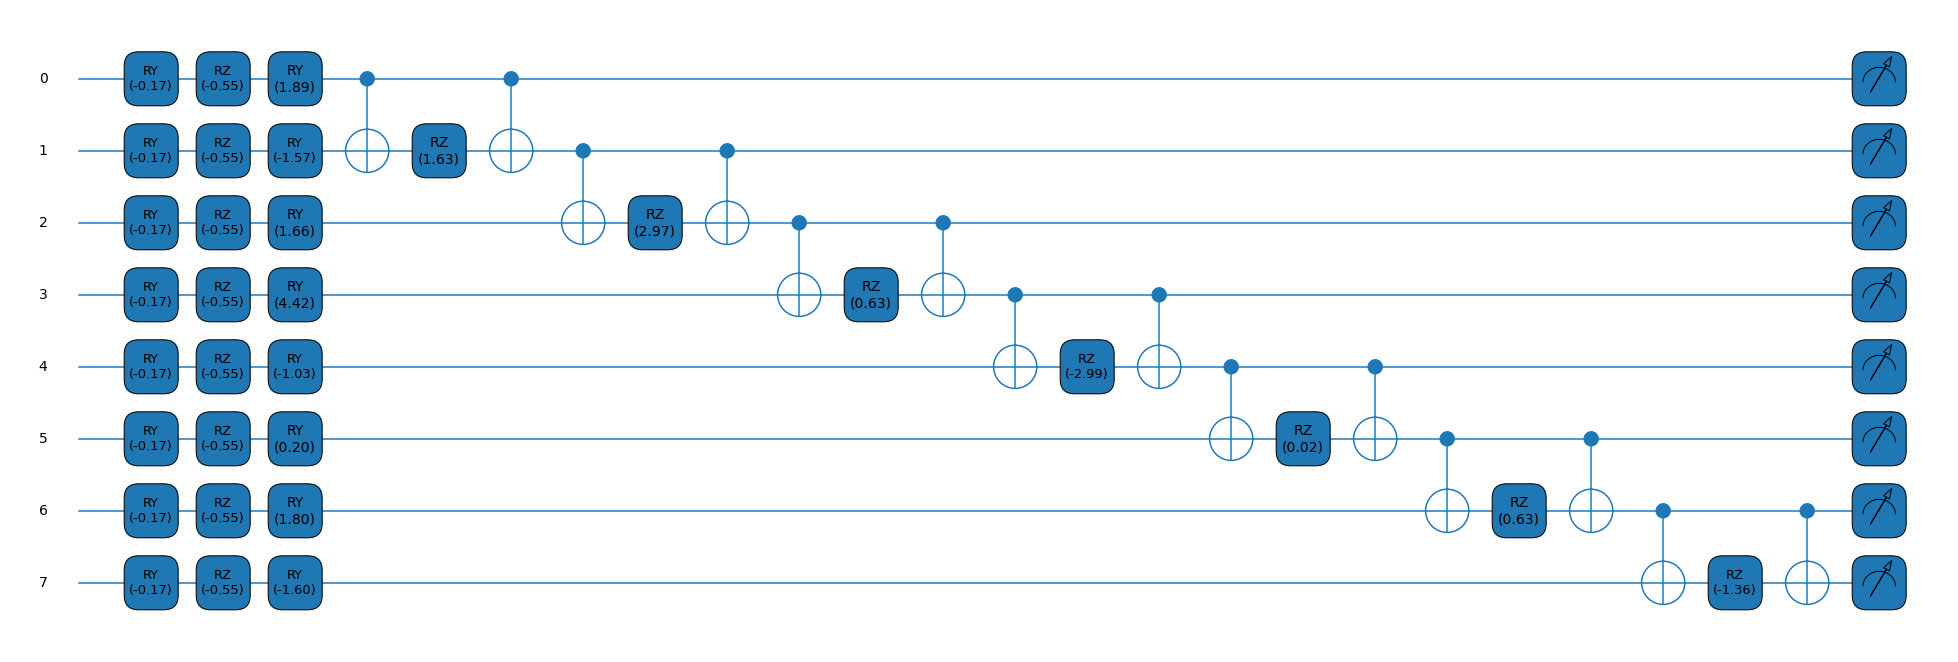

In [13]:
fig, ax = qml.draw_mpl(gen_circuit, decimals=2)(gen_weights)

In [ ]:
sample_list = [gen_circuit(gen_weights) for i in range(5000)]

In [ ]:
z = torch.stack(tuple(sample_list)).float().detach().numpy()

In [ ]:
fig = plt.figure(figsize=(60, 30))
xaxes = ['x1','x2','x3','x4','x5','x6','x7','x8']
yaxes = ['y1','y2','y3','y4','y5','y6','y7','y8']
titles = '12345678'
f,a = plt.subplots(4, 2, figsize=(8,8))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(z[:,idx], bins=100)
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
    ax.set_title(titles[idx])
plt.tight_layout()